In [1]:
%matplotlib inline


# Gromov-Wasserstein example
This example is designed to show how to use the Gromov-Wassertsein distance
computation in POT.


In [2]:
# Author: Erwan Vautier <erwan.vautier@gmail.com>
#         Nicolas Courty <ncourty@irisa.fr>
#
# License: MIT License

import scipy as sp
import numpy as np
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D  # noqa
import ot

## Sample two Gaussian distributions (2D and 3D)

The Gromov-Wasserstein distance allows to compute distances with samples that
do not belong to the same metric space. For demonstration purpose, we sample
two Gaussian distributions in 2- and 3-dimensional spaces.



In [12]:
n_samples = 30  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4, 4])
cov_t = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])


xs = ot.datasets.make_2D_samples_gauss(n_samples, mu_s, cov_s)
P = sp.linalg.sqrtm(cov_t)
xt = np.random.randn(n_samples, 3).dot(P) + mu_t

## Plotting the distributions



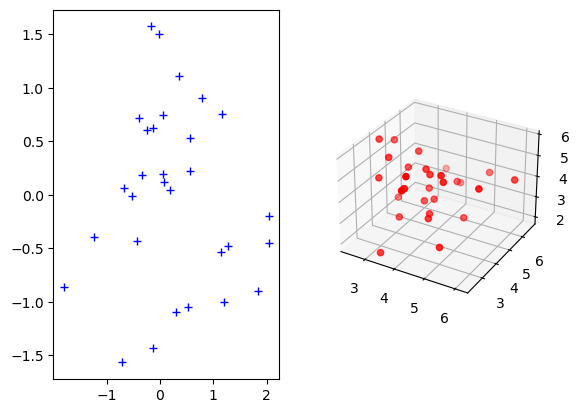

In [13]:
fig = pl.figure()
ax1 = fig.add_subplot(121)
ax1.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(xt[:, 0], xt[:, 1], xt[:, 2], color='r')
pl.show()

## Compute distance kernels, normalize them and then display



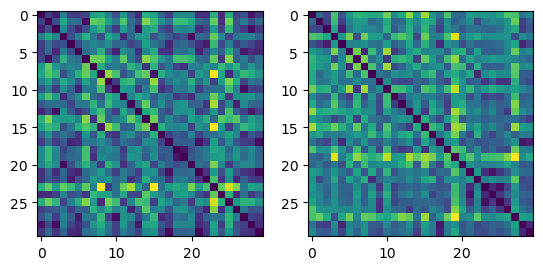

In [14]:
C1 = sp.spatial.distance.cdist(xs, xs)
C2 = sp.spatial.distance.cdist(xt, xt)

C1 /= C1.max()
C2 /= C2.max()

pl.figure()
pl.subplot(121)
pl.imshow(C1)
pl.subplot(122)
pl.imshow(C2)
pl.show()

In [16]:
C1.shape

(30, 30)

## Compute Gromov-Wasserstein plans and distance



It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|8.303390e-02|0.000000e+00|0.000000e+00
    1|3.858193e-02|1.152145e+00|4.445197e-02
    2|3.106860e-02|2.418304e-01|7.513330e-03
    3|2.676960e-02|1.605924e-01|4.298994e-03
    4|2.319274e-02|1.542232e-01|3.576860e-03
    5|2.319274e-02|0.000000e+00|0.000000e+00
It.  |Err         
-------------------
    0|8.594732e-02|


/home/rokabe/anaconda3/envs/symdiff118/lib/python3.9/site-packages/ot/bregman.py:535: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|3.860066e-04|
   20|1.532499e-07|
   30|6.172294e-11|
Gromov-Wasserstein distances: 0.023192744816504587
Entropic Gromov-Wasserstein distances: 0.02116414555876034


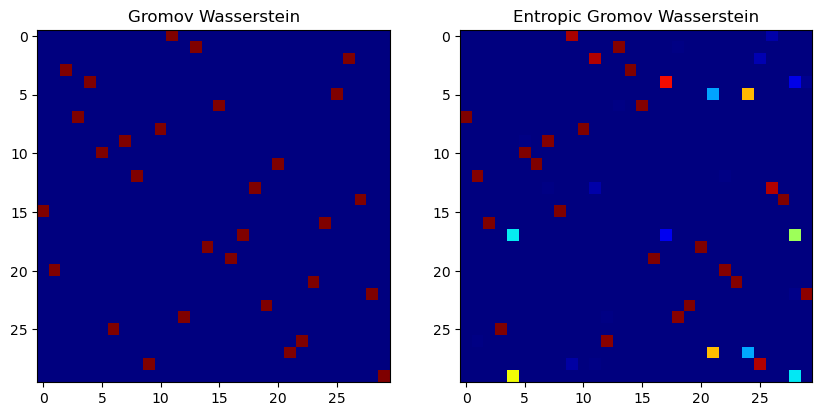

In [36]:
p = ot.unif(n_samples)
q = ot.unif(n_samples)

gw0, log0 = ot.gromov.gromov_wasserstein(
    C1, C2, p, q, 'square_loss', verbose=True, log=True)

gw, log = ot.gromov.entropic_gromov_wasserstein(
    C1, C2, p, q, 'square_loss', epsilon=5e-4, log=True, verbose=True)


print('Gromov-Wasserstein distances: ' + str(log0['gw_dist']))
print('Entropic Gromov-Wasserstein distances: ' + str(log['gw_dist']))


pl.figure(1, (10, 5))

pl.subplot(1, 2, 1)
pl.imshow(gw0, cmap='jet')
pl.title('Gromov Wasserstein')

pl.subplot(1, 2, 2)
pl.imshow(gw, cmap='jet')
pl.title('Entropic Gromov Wasserstein')

pl.show()

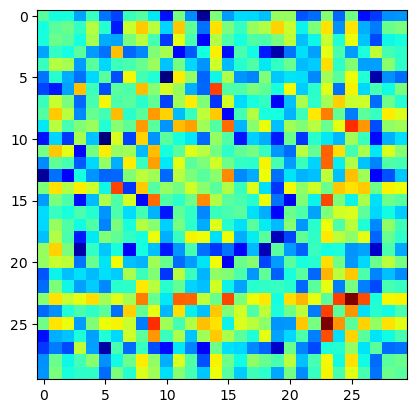

In [31]:
pl.imshow(C1-C2, cmap='jet')

In [38]:
log0

{'loss': [0.08303390319471018,
  0.03858192938975853,
  0.03106859901508453,
  0.026769604829907034,
  0.023192744816504587,
  0.023192744816504587],
 'cost': 0.06305965018569862,
 'u': array([0.03461094, 0.02841736, 0.034116  , 0.01694466, 0.01567413,
        0.03323729, 0.02665673, 0.03461094, 0.03461094, 0.03397245,
        0.03461094, 0.03461094, 0.01277553, 0.03020972, 0.03461094,
        0.03993028, 0.03755923, 0.02659711, 0.03343194, 0.03461094,
        0.02385663, 0.03461094, 0.03072004, 0.03461094, 0.04407357,
        0.0327492 , 0.02616726, 0.03824396, 0.03445231, 0.03461094]),
 'v': array([ 7.52275019e-02,  5.97661372e-02,  4.72033657e-02,  5.45196660e-02,
         3.87678780e-02,  4.82975430e-02,  4.36925905e-02,  4.32396476e-02,
         4.07986309e-02, -9.63973644e-04,  6.40250665e-02,  1.65987830e-02,
         9.95486679e-04,  1.85625154e-02,  1.34837424e-02,  1.90654679e-02,
         1.72614210e-02,  2.27588972e-02,  1.99274260e-02,  1.60643518e-01,
         5.84641686e

In [39]:
log

{'err': [0.08594732489663814,
  0.00038600664527853107,
  1.5324986260824848e-07,
  6.172294065219163e-11],
 'gw_dist': 0.02116414555876034}

## Compute GW with a scalable stochastic method with any loss function



Pointwise Gromov-Wasserstein distance estimated: 0.1617971617112176
Variance estimated: 0.0
Sampled Gromov-Wasserstein distance: 0.11677288220733018
Variance estimated: 4.7361436874476586e-05


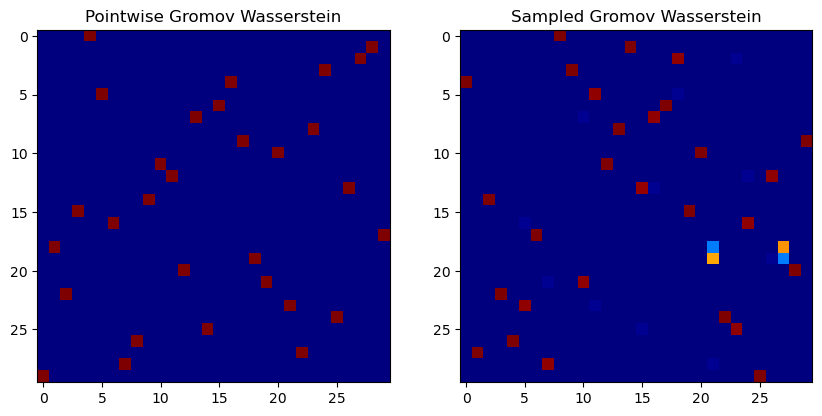

In [7]:
def loss(x, y):
    return np.abs(x - y)


pgw, plog = ot.gromov.pointwise_gromov_wasserstein(C1, C2, p, q, loss, max_iter=100,
                                                   log=True)

sgw, slog = ot.gromov.sampled_gromov_wasserstein(C1, C2, p, q, loss, epsilon=0.1, max_iter=100,
                                                 log=True)

print('Pointwise Gromov-Wasserstein distance estimated: ' + str(plog['gw_dist_estimated']))
print('Variance estimated: ' + str(plog['gw_dist_std']))
print('Sampled Gromov-Wasserstein distance: ' + str(slog['gw_dist_estimated']))
print('Variance estimated: ' + str(slog['gw_dist_std']))


pl.figure(1, (10, 5))

pl.subplot(1, 2, 1)
pl.imshow(pgw.toarray(), cmap='jet')
pl.title('Pointwise Gromov Wasserstein')

pl.subplot(1, 2, 2)
pl.imshow(sgw, cmap='jet')
pl.title('Sampled Gromov Wasserstein')

pl.show()